In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/prasa/Downloads/TB_Chest_Radiography_Database/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:/Users/prasa/Downloads/TB_Chest_Radiography_Database/Normal.metadata.xlsx
C:/Users/prasa/Downloads/TB_Chest_Radiography_Database/README.md.txt
C:/Users/prasa/Downloads/TB_Chest_Radiography_Database/Tuberculosis.metadata.xlsx
C:/Users/prasa/Downloads/TB_Chest_Radiography_Database/Normal\Normal-1.png
C:/Users/prasa/Downloads/TB_Chest_Radiography_Database/Normal\Normal-10.png
C:/Users/prasa/Downloads/TB_Chest_Radiography_Database/Normal\Normal-100.png
C:/Users/prasa/Downloads/TB_Chest_Radiography_Database/Normal\Normal-1000.png
C:/Users/prasa/Downloads/TB_Chest_Radiography_Database/Normal\Normal-1001.png
C:/Users/prasa/Downloads/TB_Chest_Radiography_Database/Normal\Normal-1002.png
C:/Users/prasa/Downloads/TB_Chest_Radiography_Database/Normal\Normal-1003.png
C:/Users/prasa/Downloads/TB_Chest_Radiography_Database/Normal\Normal-1004.png
C:/Users/prasa/Downloads/TB_Chest_Radiography_Database/Normal\Normal-1005.png
C:/Users/prasa/Downloads/TB_Chest_Radiography_Database/Normal\Normal-1006.png

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torchvision.datasets import ImageFolder
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [33]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [34]:
full_dataset = ImageFolder(root="C:/Users/prasa/Downloads/TB_Chest_Radiography_Database/", transform=transform)

In [35]:
train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset, [train_size, val_size, test_size]
)

In [36]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

In [37]:
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.batch_norm1 = nn.BatchNorm2d(16)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.batch_norm2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.batch_norm3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.batch_norm4 = nn.BatchNorm2d(128)
        self.relu4 = nn.ReLU()
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.batch_norm5 = nn.BatchNorm2d(256)
        self.relu5 = nn.ReLU()
        self.maxpool5 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.dropout1 = nn.Dropout(0.5)
        self.dropout2 = nn.Dropout(0.5)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(256 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 2)  
    def forward(self, x):
        x = self.maxpool1(self.relu1(self.batch_norm1(self.conv1(x))))
        x = self.maxpool2(self.relu2(self.batch_norm2(self.conv2(x))))
        x = self.maxpool3(self.relu3(self.batch_norm3(self.conv3(x))))
        x = self.maxpool4(self.relu4(self.batch_norm4(self.conv4(x))))
        x = self.maxpool5(self.relu5(self.batch_norm5(self.conv5(x))))
        x = self.dropout1(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return x
    
    def save(self, filepath):
        """
        Save the model to a file.

        Args:
            filepath (str): File path to save the model.
        """
        torch.save(self.state_dict(), filepath)
        print(f"Model saved to {filepath}")
    

Model_grp32 = CustomCNN().to(device)

print(Model_grp32)

CustomCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch_norm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch_norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch_norm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch_norm4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=Tru

In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Model_grp32.parameters(), lr=0.001)

In [39]:
best_val_loss = float('inf')
patience = 3  # Number of epochs to wait for improvement
counter = 0  # Counter for how many epochs the validation loss hasn't improved

In [43]:
train_losses = []  # To store training losses during each epoch
val_losses = []    # To store validation losses during each epoch
train_accuracies = []  # To store training accuracies during each epoch
val_accuracies = []    # To store validation accuracies during each epoch
train_true_labels = []  # To store true labels during training
train_predicted_labels = []  # To store predicted labels during training
val_true_labels = []  # To store true labels during validation
val_predicted_labels = []  # To store predicted labels during validation
test_true_labels = []  # To store true labels during testing
test_predicted_labels = []  # To store predicted labels during testing

best_val_loss = float('inf')
patience = 3  # Number of epochs to wait for improvement
counter = 0  # Counter for how many epochs the validation loss hasn't improved

num_epochs = 5
for epoch in range(num_epochs):
    Model_grp32.train()
    train_true_labels_epoch = []
    train_predicted_labels_epoch = []

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = Model_grp32(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        train_true_labels_epoch.extend(labels.cpu().numpy())
        train_predicted_labels_epoch.extend(predicted.cpu().numpy())

    # Aggregate true and predicted labels for the entire training set
    train_true_labels.extend(train_true_labels_epoch)
    train_predicted_labels.extend(train_predicted_labels_epoch)

    # Calculate training accuracy and loss
    train_accuracy = accuracy_score(train_true_labels, train_predicted_labels)
    train_loss = criterion(outputs, labels)

    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss.item())

    # Validation loop
    Model_grp32.eval()
    val_true_labels_epoch = []
    val_predicted_labels_epoch = []

    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        val_loss = 0.0
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = Model_grp32(inputs)
            _, predicted = torch.max(outputs, 1)
            total_samples += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            val_loss += criterion(outputs, labels).item()

            val_true_labels_epoch.extend(labels.cpu().numpy())
            val_predicted_labels_epoch.extend(predicted.cpu().numpy())

        # Aggregate true and predicted labels for the entire validation set
        val_true_labels.extend(val_true_labels_epoch)
        val_predicted_labels.extend(val_predicted_labels_epoch)

        accuracy = total_correct / total_samples
        avg_val_loss = val_loss / len(val_loader)

        val_accuracies.append(accuracy)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch + 1}/{num_epochs}, Validation Accuracy: {accuracy:.4f}, Validation Loss: {avg_val_loss:.4f}")

        # Check for improvement in validation loss
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            counter = 0
        else:
            counter += 1

        # Check if early stopping criteria are met
        if counter >= patience:
            print(f"Early stopping at epoch {epoch + 1} due to no improvement in validation loss.")
            break
            
# Calculate confusion matrix, precision, recall, and F1 score for training and validation
train_cm = confusion_matrix(train_true_labels, train_predicted_labels)
val_cm = confusion_matrix(val_true_labels, val_predicted_labels)

train_precision, train_recall, train_f1_score, _ = precision_recall_fscore_support(train_true_labels, train_predicted_labels, average='binary')
val_precision, val_recall, val_f1_score, _ = precision_recall_fscore_support(val_true_labels, val_predicted_labels, average='binary')

print(f"Training Confusion Matrix:\n{train_cm}")
print(f"Training Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1-Score: {train_f1_score:.4f}")
print(f"Validation Confusion Matrix:\n{val_cm}")
print(f"Validation Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1-Score: {val_f1_score:.4f}")


Epoch 1/5: 100%|██████████| 92/92 [02:09<00:00,  1.41s/it]


Epoch 1/5, Validation Accuracy: 0.9841, Validation Loss: 0.1268


Epoch 2/5: 100%|██████████| 92/92 [22:15:27<00:00, 870.95s/it]      


Epoch 2/5, Validation Accuracy: 0.9444, Validation Loss: 0.5007


Epoch 3/5: 100%|██████████| 92/92 [02:00<00:00,  1.31s/it]


Epoch 3/5, Validation Accuracy: 0.9794, Validation Loss: 0.1474


Epoch 4/5: 100%|██████████| 92/92 [02:46<00:00,  1.82s/it]


Epoch 4/5, Validation Accuracy: 0.9857, Validation Loss: 0.1355
Early stopping at epoch 4 due to no improvement in validation loss.
Training Confusion Matrix:
[[9781   35]
 [  34 1910]]
Training Precision: 0.9820, Recall: 0.9825, F1-Score: 0.9823
Validation Confusion Matrix:
[[2030   18]
 [  49  423]]
Validation Precision: 0.9592, Recall: 0.8962, F1-Score: 0.9266


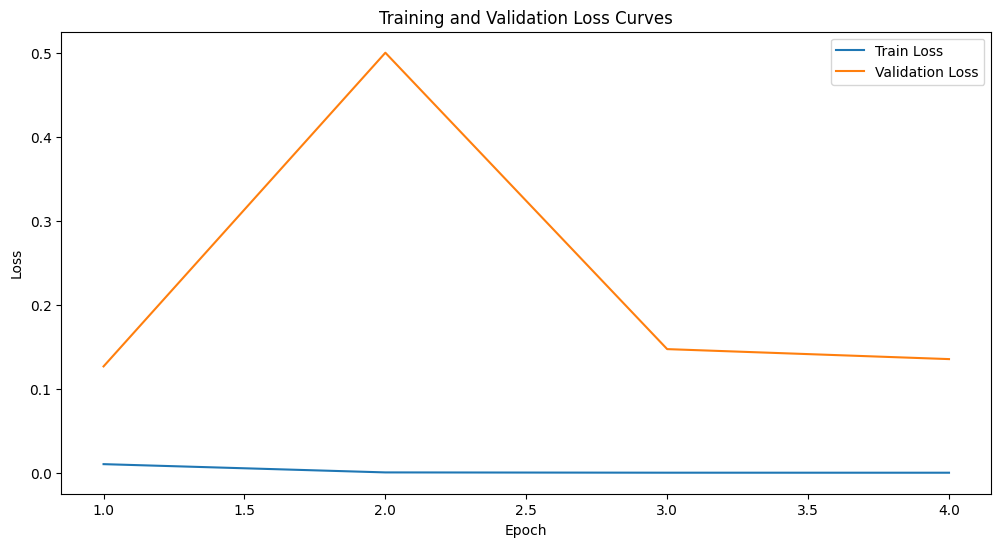

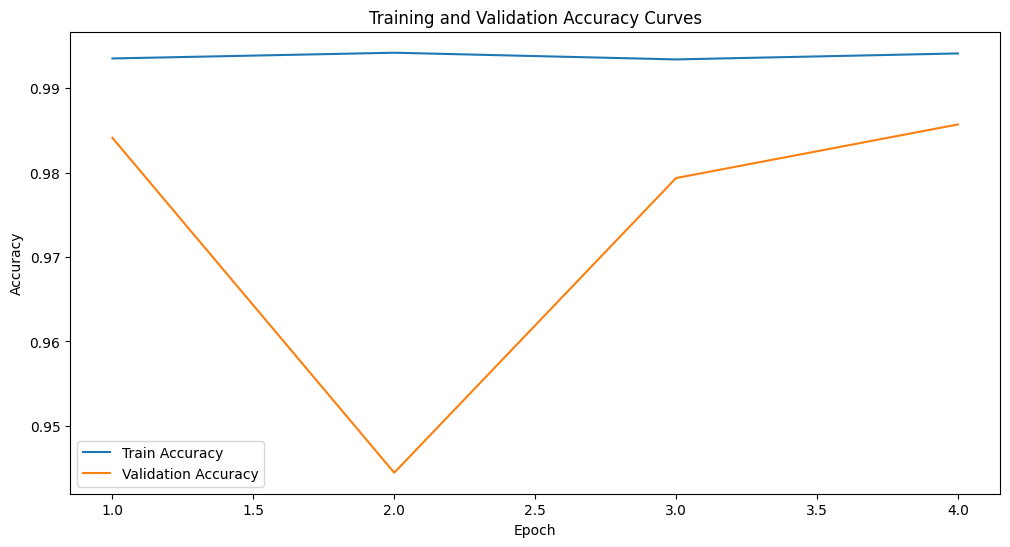

In [44]:
import matplotlib.pyplot as plt

# Assuming you have the following lists populated:
# train_losses, val_losses, train_accuracies, val_accuracies

# Training and Validation Loss Curves
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and Validation Accuracy Curves
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

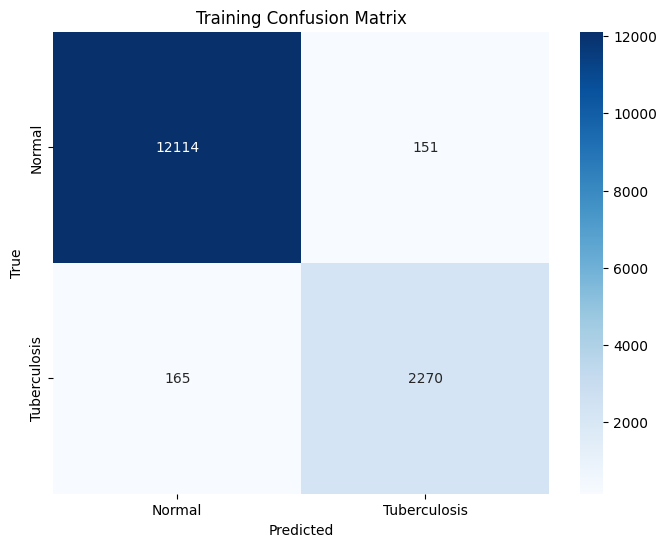

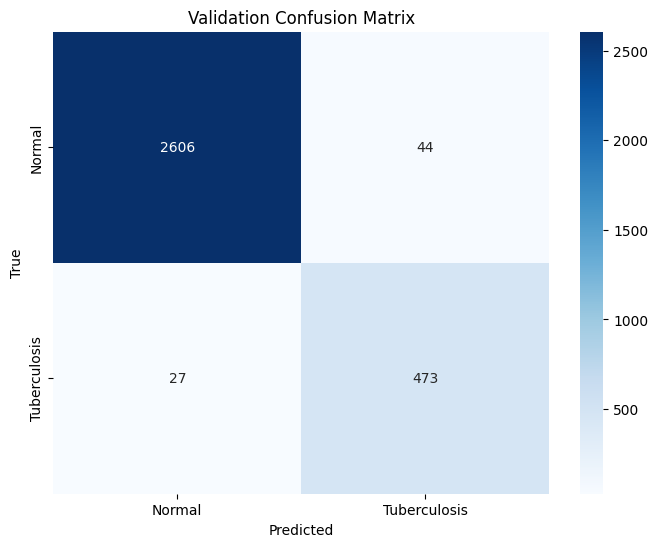

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Assuming you have the following lists populated:
# train_true_labels, train_predicted_labels, val_true_labels, val_predicted_labels

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices for training and validation
plot_confusion_matrix(train_true_labels, train_predicted_labels, labels=['Normal', 'Tuberculosis'], title='Training Confusion Matrix')
plot_confusion_matrix(val_true_labels, val_predicted_labels, labels=['Normal', 'Tuberculosis'], title='Validation Confusion Matrix')

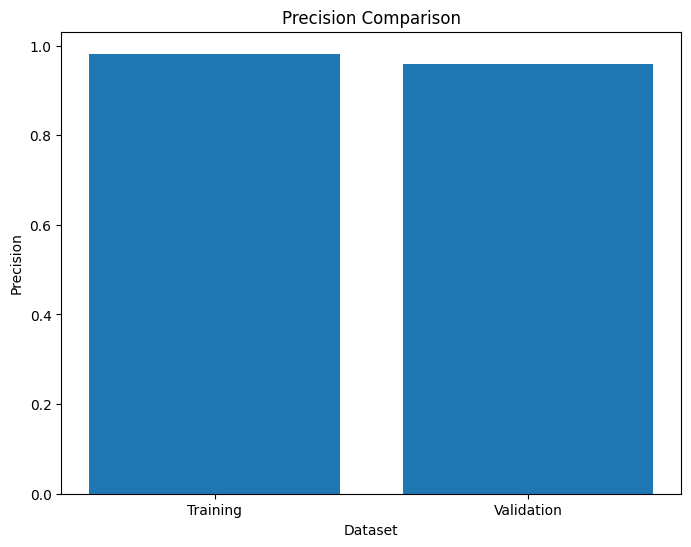

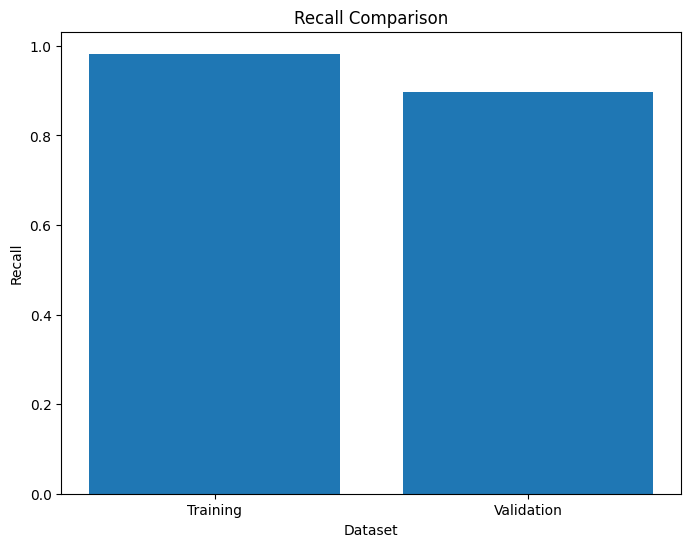

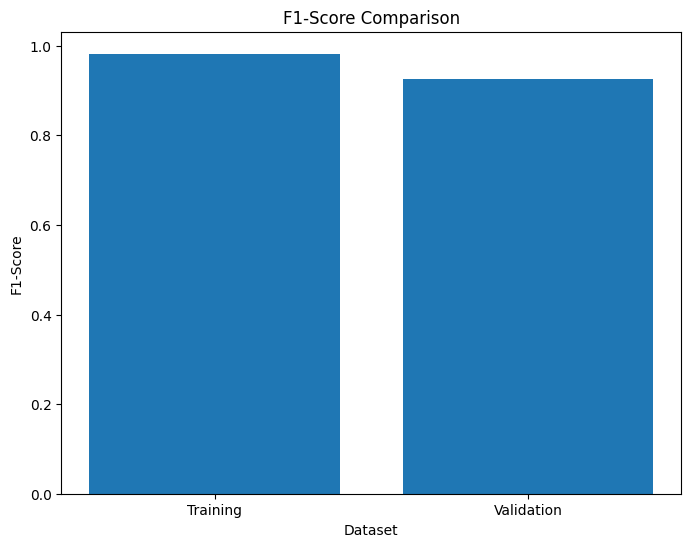

In [45]:
# Precision, Recall, and F1 Score
def plot_metrics_bar_chart(train_metric, val_metric, metric_name, title):
    plt.figure(figsize=(8, 6))
    plt.bar(['Training', 'Validation'], [train_metric, val_metric])
    plt.title(title)
    plt.xlabel('Dataset')
    plt.ylabel(metric_name)
    plt.show()

# Calculate precision, recall, and F1 score for training and validation
train_precision, train_recall, train_f1_score, _ = precision_recall_fscore_support(train_true_labels, train_predicted_labels, average='binary')
val_precision, val_recall, val_f1_score, _ = precision_recall_fscore_support(val_true_labels, val_predicted_labels, average='binary')

# Plot precision, recall, and F1 score bar charts for training and validation
plot_metrics_bar_chart(train_precision, val_precision, 'Precision', 'Precision Comparison')
plot_metrics_bar_chart(train_recall, val_recall, 'Recall', 'Recall Comparison')
plot_metrics_bar_chart(train_f1_score, val_f1_score, 'F1-Score', 'F1-Score Comparison')

In [21]:
print("Hello!")

Hello!


In [46]:
test_true_labels = []  # To store true labels during testing
test_predicted_labels = []  # To store predicted labels during testing

Model_grp32.eval()
with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc="Testing"):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = Model_grp32(inputs)
        _, predicted = torch.max(outputs, 1)
        test_true_labels.extend(labels.cpu().numpy())
        test_predicted_labels.extend(predicted.cpu().numpy())

# Calculate confusion matrix, precision, recall, and F1 score for testing
test_cm = confusion_matrix(test_true_labels, test_predicted_labels)
test_precision, test_recall, test_f1_score, _ = precision_recall_fscore_support(test_true_labels, test_predicted_labels, average='binary')

# Print and visualize the results
print(f"Test Confusion Matrix:\n{test_cm}")
print(f"Test Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-Score: {test_f1_score:.4f}")

Testing: 100%|██████████| 20/20 [00:49<00:00,  2.48s/it]

Test Confusion Matrix:
[[533   1]
 [  4  92]]
Test Precision: 0.9892, Recall: 0.9583, F1-Score: 0.9735


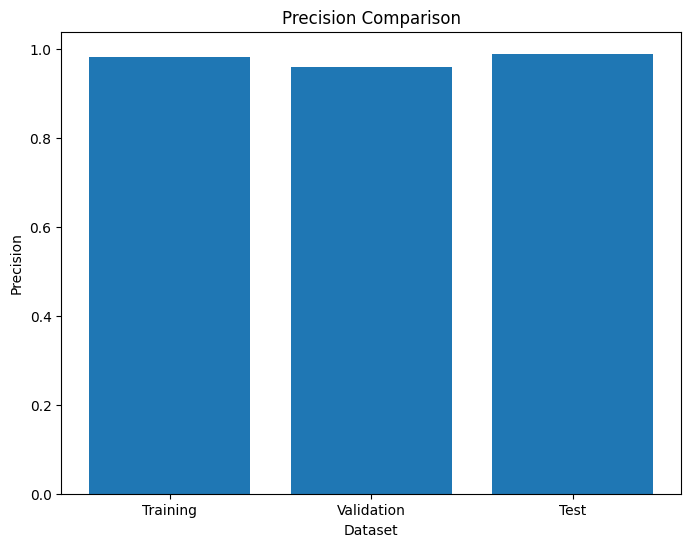

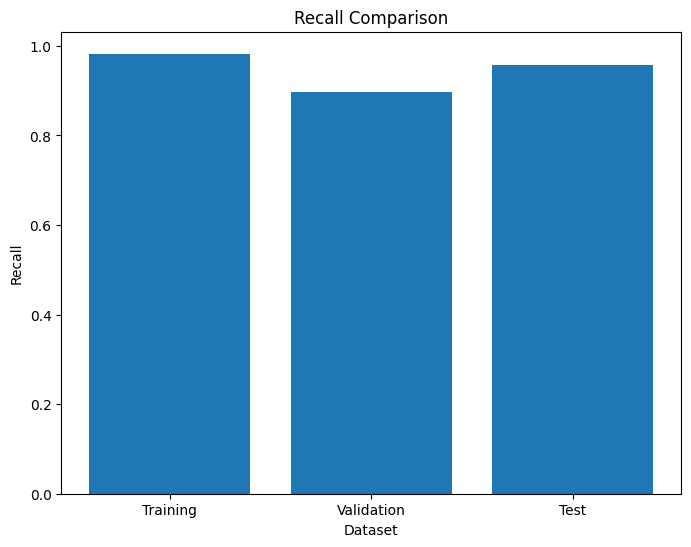

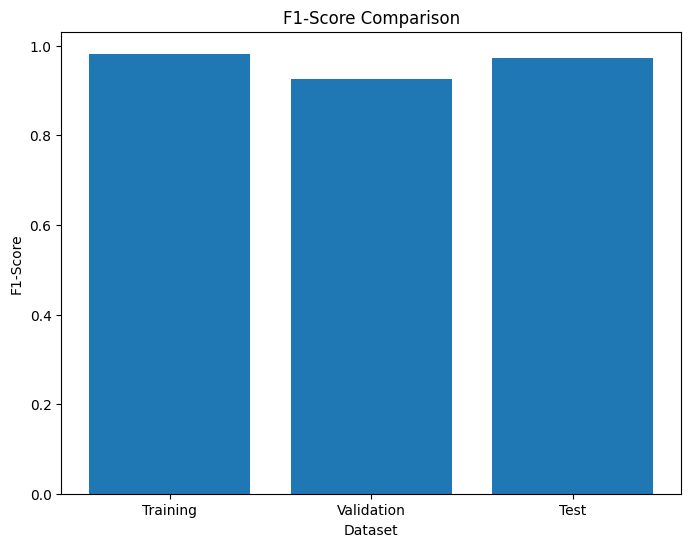

In [47]:
def plot_metrics_comparison(train_metric, val_metric, test_metric, metric_name, title):
    plt.figure(figsize=(8, 6))
    labels = ['Training', 'Validation', 'Test']
    values = [train_metric, val_metric, test_metric]
    plt.bar(labels, values)
    plt.title(title)
    plt.xlabel('Dataset')
    plt.ylabel(metric_name)
    plt.show()

# Plot precision comparison
plot_metrics_comparison(train_precision, val_precision, test_precision, 'Precision', 'Precision Comparison')

# Plot recall comparison
plot_metrics_comparison(train_recall, val_recall, test_recall, 'Recall', 'Recall Comparison')

# Plot F1 score comparison
plot_metrics_comparison(train_f1_score, val_f1_score, test_f1_score, 'F1-Score', 'F1-Score Comparison')

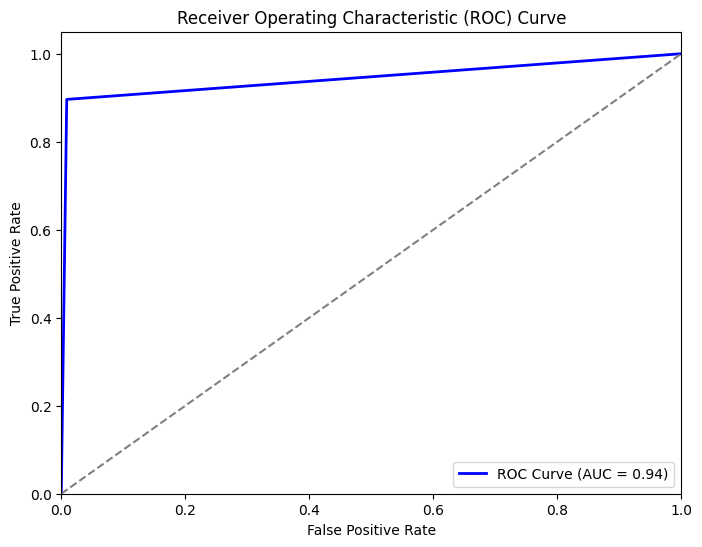

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2048
           1       0.96      0.90      0.93       472

    accuracy                           0.97      2520
   macro avg       0.97      0.94      0.96      2520
weighted avg       0.97      0.97      0.97      2520



In [48]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Calculate ROC AUC score
auc_score = roc_auc_score(val_true_labels, val_predicted_labels)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(val_true_labels, val_predicted_labels)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Generate classification report
classification_rep = classification_report(val_true_labels, val_predicted_labels)
print("Classification Report:")
print(classification_rep)



In [49]:
Model_grp32.save("less_accurate_model.h5")

Model saved to less_accurate_model.h5


In [50]:
# Initialize your model
model = CustomCNN()

# Train your model, then save it
model.save("custom_cnn_model.pth")


Model saved to custom_cnn_model.pth
